In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1 , random_state=40)
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\Emotion-Detection using text\Mental_Health\Stress-Lysis.csv")
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


<Axes: xlabel='Stress Level', ylabel='count'>

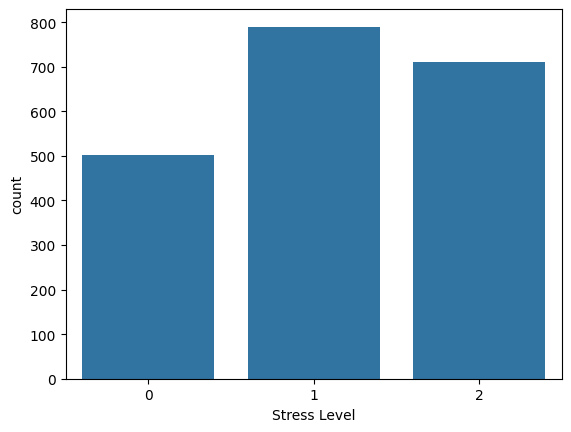

In [3]:
df['Stress Level'].value_counts()
sns.countplot(x='Stress Level', data=df)

In [4]:
Xfeatures= df.drop('Stress Level', axis=1)
Ylabels = df['Stress Level'].values.reshape(-1,1)
scaler= StandardScaler()
Xfeatures=scaler.fit_transform(Xfeatures)
x_train,x_test,y_train,y_test= train_test_split(Xfeatures, Ylabels, test_size=0.3, random_state=42)
model.fit(x_train,y_train)
model.score(x_test,y_test)

c:\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0

In [7]:
import joblib
pipeline_file= open("stress.pkl", "wb")
joblib.dump(model, pipeline_file)
pipeline_file.close()